In [20]:
#importing libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


iotdata = pd.read_csv('lajufelicity_data.csv')

#Create an instance of labelencoder
labelencoder = LabelEncoder()


iotdata.shape

iotdata.info()

iotdata.isnull().sum().sum()

iotdata.head

#Label encodint for the pump and heater values 
iotdata['heater'] =labelencoder.fit_transform(iotdata['heater'])

iotdata['pump'] =labelencoder.fit_transform(iotdata['pump'])
iotdata.head

#Select the X and Y datasets 
X = iotdata.iloc[:,[0,1,3,4,5,6]] #[0,1,3,4,5,6] columns
Y = iotdata.iloc[:, 2]

X.head

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error





train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 100)

regressor = RandomForestRegressor(random_state = 100)
regressor.fit(train_X, train_Y)
Y_pred = regressor.predict(val_X)


print('Mean Absolute Error of model = {}'.format(mean_absolute_error(val_Y, Y_pred)))


X_new = [[40, 20, 0, 60, 90, 1]]
LDR_pred = regressor.predict(X_new)
print("\nWhen temp1=40, temp2=20, humidity1=60, humidity2=90, The pump is ON and heater is off:")
print("LDR value = {}".format(LDR_pred[0]))







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13008 entries, 0 to 13007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp1      13008 non-null  int64  
 1   temp2      13008 non-null  int64  
 2   ldr        13008 non-null  int64  
 3   heater     13003 non-null  object 
 4   humidity1  13008 non-null  int64  
 5   humidity2  13008 non-null  int64  
 6   pump       0 non-null      float64
 7   time       0 non-null      float64
dtypes: float64(2), int64(5), object(1)
memory usage: 813.1+ KB
Mean Absolute Error of model = 224.09663181864772

When temp1=40, temp2=20, humidity1=60, humidity2=90, The pump is ON and heater is off:
LDR value = 657.02


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Values')

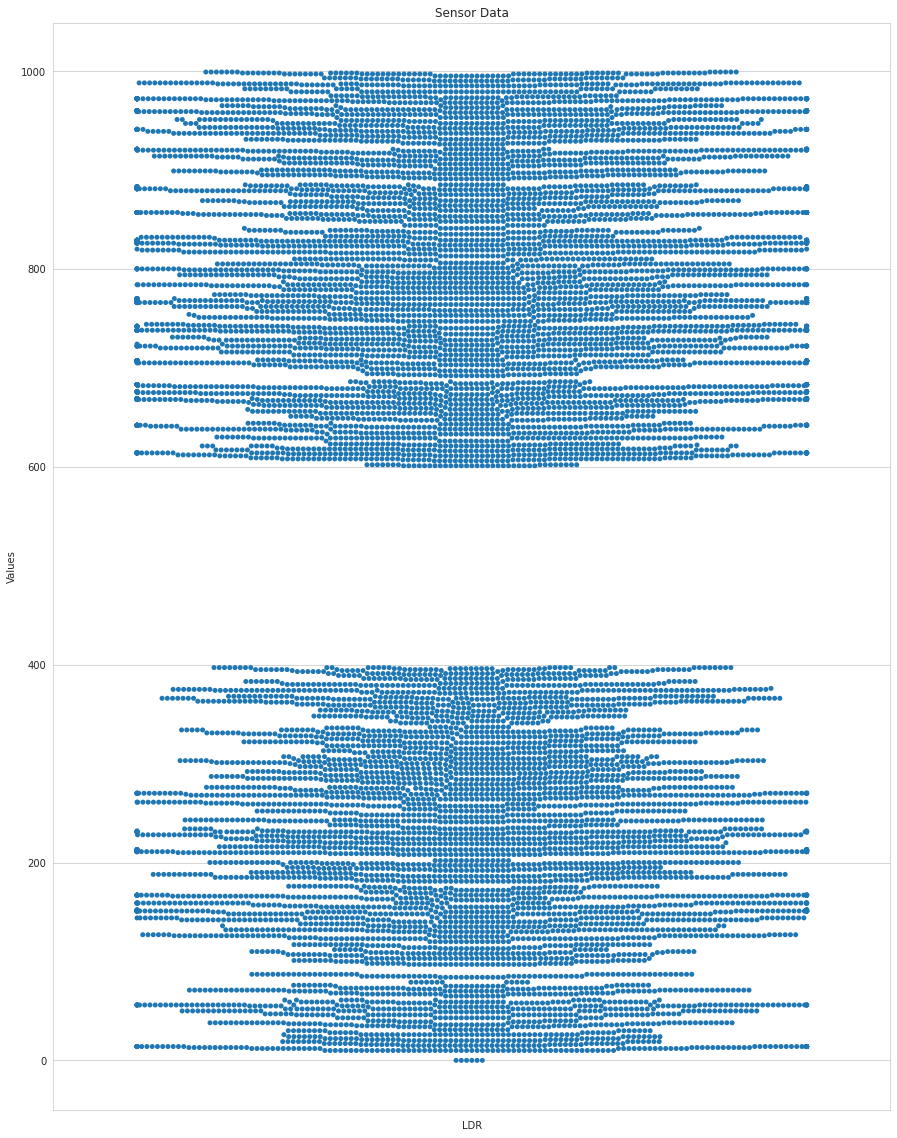

In [17]:
# Plotting spread of LDR values
sns.set_style('whitegrid')
plt.figure(figsize=(15,20))
# Swarmplot with melted_df
ax2 = sns.swarmplot(y='ldr', data=iotdata)
ax2.set_title('Sensor Data')
ax2.set_xlabel('LDR')
ax2.set_ylabel('Values')

Text(0, 0.5, 'value')

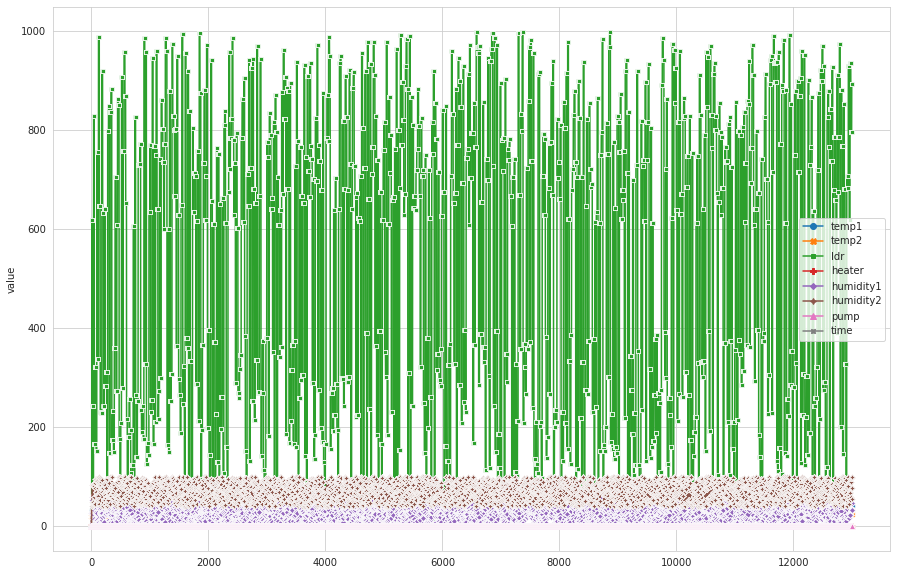

In [18]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(data=iotdata, markers=True, dashes=False)
ax.set_ylabel('value')